### Sums of Squares (Definition Formulas)

$\bullet$  SUMS OF SQUARES (TWO FACTOR)

$SS_{total}=SS_{column}+SS_{row}+SS_{interaction}+SS_{within}$

$SS_{total}=SS_{between}+SS_{within}$

$SS_{total}=\Sigma(X-\overline{X}_{grand})^2$

$SS_{between}=SS_{column}+SS_{row}+SS_{interaction}$

$SS_{interaction}=SS_{between}-(SS_{column}+SS_{row})$

### $\bullet$ WORD, DEFINITION, AND COMPUTATION FORMULAS FOR SS TERMS (TWO-FACTOR ANOVA)
#### $\bullet$ $\bullet$ For the total sums of squares,

$SS_{total}=$ the sum of squared deviations for raw scores about the grand mean

$=\Sigma(X-\overline{X}_{grand})^2$

$SS_{total}=\Sigma{X}^2-\dfrac{G^2}{N}$, where $G$ is the grand total and $N$ is its sample size

#### $\bullet$ $\bullet$ For the between-cells sum of squares,

$SS_{between}=$ the sum of squared deviations for cell means about the grand mean

$=n\Sigma(\overline{X}_{cell}-\overline{X}_{grand})^2$

$SS_{between}=\Sigma{\dfrac{T^2_{cell}}{n}}-\dfrac{G^2}{N}$, where $T_{cell}$ is the cell total and $n$ is its sample size of each cell

#### $\bullet$ $\bullet$ For the within-cells sum of squares,

$SS_{within}=$ the sum of squared deviations of raw scores about their respective cell means

$=\Sigma(X-\overline{X}_{cell})^2$

$SS_{within}=\Sigma{X}^2-\Sigma{\dfrac{T^2_{cell}}{n}}$, where $T_{cell}$ is the cell total and $n$ is the sample sizeof each cell

#### $\bullet$ $\bullet$ For the between-columns sum of squares,

$SS_{column}=$ the sum of squared column means about the grand mean

$=rn\Sigma(\overline{X}_{column}-\overline{X}_{grand})^2$

$SS_{column}=\Sigma{\dfrac{T^2_{column}}{rn}}-\dfrac{G^2}{N}$, where $T_{column}$ is the column total, $r$ is the number of rows, and $rn$ is the sample size of each column

#### $\bullet$ $\bullet$ For the between-rows sum of squares,

$SS_{row}=$ the sum of squared of raw means about the grand mean

$=cn\Sigma(\overline{X}_{row}-\overline{X}_{grand})^2$

$SS_{row}=\Sigma{\dfrac{T^2_{row}}{cn}}-\dfrac{G^2}{N}$, where $T_{row}$ is the row total, $c$ is the number of columns, and $cn$ is the sample size of each row

#### $\bullet$ $\bullet$ For the interaction sum of squares,

$SS_{interaction}=SS_{between}-(SS_{columns}+SS_{row})$

#### $\bullet$ FORMULAS FOR df TERMS: TWO-FACTOR ANOVA

$df_{total}=N-1$, that is, the number of all scores$-$1

$df_{column}=c-1$, that is, the number of columns$-$1

$df_{row}=r-1$, that is, the number of rows$-$1

$df_{interaction}=(c-1)(r-1)$, that is, the product of $df_{row}$ and $df_{column}$

$df_{within}=N-(c)(r)$, that is, the number of all scores$-$the number of cells

#### PROPORTION OF EXPLAINED VARIANCE (TWO-FACTOR ANOVA)

$\eta^2_p(column)=\dfrac{SS_{column}}{SS_{total}-(SS_{row}+SS_{interaction})}=\dfrac{SS_{column}}{SS_{column}+SS_{within}}$

$\eta^2_p(row)=\dfrac{SS_{row}}{SS_{row}+SS_{within}}$

$\eta^2_p(interaction)=\dfrac{SS_{interaction}}{SS_{interaction}+SS_{within}}$

#### TUKEY’S HSD TEST (TWO-FACTOR ANOVA)

$HSD=q\sqrt{\dfrac{MS_{within}}{n}}$

#### $F_{se}$ RATIO (SIMPLE EFFECT)

$F_{se}=\dfrac{MS_{se}}{MS_{within}}$

#### SUM OF SQUARES (SIMPLE EFFECT)

$SS_{se}=\Sigma\dfrac{T^2_{se}}{n}-\dfrac{G^2_{se}}{N_{se}}$

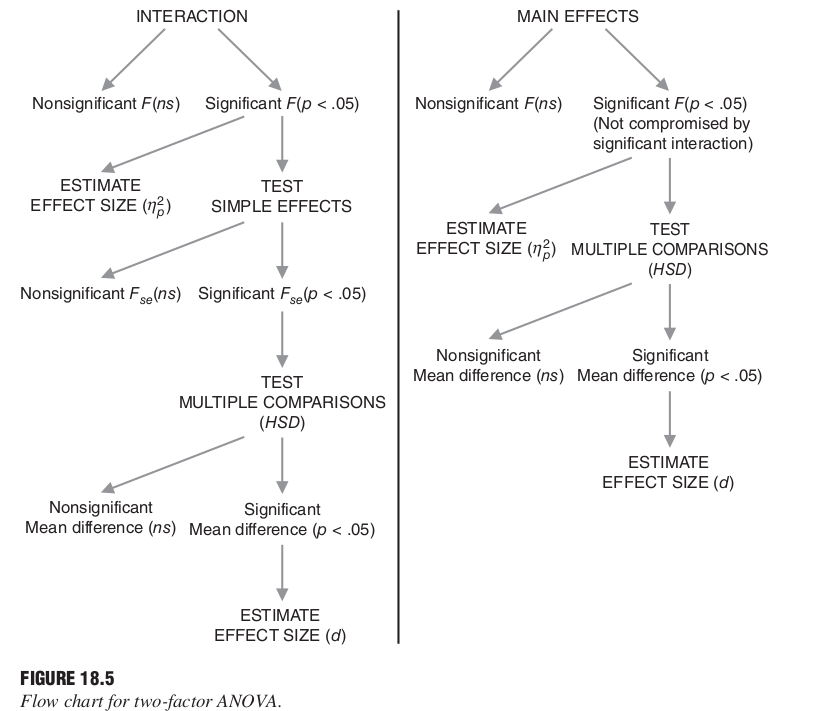

In [10]:
from IPython.display import Image
Image(filename='stat_infographic/Two_factor_Anova_flowchart.png')

In [1]:
def TWO_FACTOR_ANOVA(your_data,rows,columns,n,alpha):
    import statsmodels.stats.libqsturng as qsturng
    from scipy.stats import f
    
    print(f'your_data = {your_data}')

    print('T_cell')
    T_cell_squared = [round(((sum(item))**2)/n,3) for item in your_data]
    print(f'T_cell_squared = {T_cell_squared}')
    
    print(f'\n')
    
    print('Grand Total (G)')
    G_data = [n for sublist in your_data for n in sublist]
    G = sum(G_data)
    print(f'G = {G}')
    
    print('Number of items in data (N)')
    N = len(G_data)
    print(f'N = {N}')

    print('\n')
    
    # SS_total
    SS_total = round(sum([num**2 for num in G_data]) - G**2/N,3)
    print(f'SS_total = {SS_total}')

    # SS_between
    SS_between = round(sum(T_cell_squared) - (G**2/N),3)
    print(f'SS_between = {SS_between}')

    # SS_within
    SS_within = round(sum([num**2 for num in G_data]) - sum(T_cell_squared),3)
    print(f'SS_within = {SS_within}')
    
    print(f'\n')

    # ROW MANIPULATION
    print('ROWS')
    row_totals = []
    for i in range(0,len(your_data),columns):
        row_data = your_data[i:i+columns]
        row_numbers = [num for sublist in row_data for num in sublist]
        row_totals.append(sum(row_numbers))
    print(f'row_totals = {row_totals}')
    print('\n')

    # COLUMN MANIPULATION
    print('COLUMNS')
    column_totals = []
    for i in range(columns):
        column_data = []
        index = 0
        j = 0
        while j != rows:  
            column_data.append(sum(your_data[i]))
            i+=columns
            j+=1
        column_data_sum = sum(column_data)
        column_totals.append(column_data_sum)
    print(f'column_totals = {column_totals}')

    print('\n')

    # SS_row
    SS_row = round(sum([(num**2)/(columns*n) for num in row_totals]) - G**2/N,3)
    print(f'SS_row = {SS_row}')
    
    # SS_column
    SS_column = round(sum([(num**2)/(rows*n) for num in column_totals]) - G**2/N,3)
    print(f'SS_column = {SS_column}')

    # SS_interaction
    SS_interaction = round(SS_between - (SS_column + SS_row),3)
    print(f'SS_interaction = {SS_interaction}')

    print('\n')
    print('df TERMS')
    df_total = N - 1
    df_column = columns - 1
    df_row = rows - 1
    df_interaction = df_column*df_row
    df_within = N - (columns*rows)
    print(f'df_row = {df_row}; df_column = {df_column}; df_interaction = {df_interaction}; df_within = {df_within}; df_total = {df_total}')

    print('\n')
    print('Mean Squares')
    MS_column = round(SS_column/df_column,3)
    MS_row = round(SS_row/df_row,3)
    MS_interaction = round(SS_interaction/df_interaction,3)
    MS_within = round(SS_within/df_within,3)
    print(f'MS_row = {MS_row}; MS_column = {MS_column}; MS_interaction = {MS_interaction}; MS_within = {MS_within}')

    print('\n')
    print('CRITICAL VALUES OF F')
    F_row = round(f.ppf(1 - alpha, df_row, df_within),3)
    F_column = round(f.ppf(1 - alpha, df_column, df_within),3)
    F_interaction = round(f.ppf(1 - alpha, df_interaction, df_within),3)
    print(f'F_row = {F_row}; F_column = {F_column}; F_interaction = {F_interaction}')
    
    print('\n')
    print('F RATIOS')
    F_column = round(MS_column/MS_within,3)
    F_row = round(MS_row/MS_within,3)
    F_interaction = round(MS_interaction/MS_within,3)
    print(f'F_row = {F_row}; F_column = {F_column}; F_interaction= {F_interaction}')

    print('\n')
    print('PROPORTION OF EXPLAINED VARIANCE (TWO-FACTOR ANOVA)')
    eta_squared_column = round(SS_column/(SS_column + SS_within),3)
    eta_squared_row = round(SS_row/(SS_row + SS_within),3)
    eta_sqaured_interaction = round(SS_interaction/(SS_interaction + SS_within),3)
    print(f'eta_squared_row = {eta_squared_row}; eta_squared_column = {eta_squared_column}; eta_sqaured_interaction = {eta_sqaured_interaction}')

    print('\n')
    print('CRITICAL VALUE of q')
    q = round(qsturng.qsturng(1 - alpha, columns, df_within),3)
    print(f'q = {q}')

    print('\n')
    print('HSD Higly Significant Difference')
    HSD = round(q*(MS_within/n)**0.5,3)
    print(f'HSD = {HSD}')

In [2]:
danger_zero = [8,8]
danger_two = [8,6]
danger_four = [10,8]
non_danger_zero = [9,11]
non_danger_two = [15,19]
non_danger_four = [24,18]
danger_data = [danger_zero,danger_two,danger_four,non_danger_zero,non_danger_two,non_danger_four]
rows3 = 2
columns3 = 3
n = 2
alp = 0.05
print(danger_data)

[[8, 8], [8, 6], [10, 8], [9, 11], [15, 19], [24, 18]]


#### Table 18.1 p.340
###### OUTCOME OF TWO-FACTOR EXPERIMENT
###### (REACTION TIMES IN MINUTES)

###### CROWD SIZE

### Crowd Size Degree of Danger

\begin{array}{ccc}
\text{DEGREE OF DANGER} & \text{ZERO} & \ & \text{TWO} & \ & \text{FOUR} & \ & \text{Row~Totals} \\
\hline
Dangerous & 8 &  & 8 &  & 10 &  &  \\
 & 8 & 16 & 6 & 14 & 8 & 18 & 48  \\
Non~dangerous & 9 &  & 15 &  &  24 &  \\
 & 11 & 20 & 19 & 34 &  18 & 42 & 96 \\
\end{array}

In [3]:
danger_zero = [8,8]
danger_two = [8,6]
danger_four = [10,8]
non_danger_zero = [9,11]
non_danger_two = [15,19]
non_danger_four = [24,18]
danger_data = [danger_zero,danger_two,danger_four,non_danger_zero,non_danger_two,non_danger_four]
rows3 = 2
columns3 = 3
n = 2
alp = 0.05
TWO_FACTOR_ANOVA(danger_data,rows3,columns3,n,alp)

your_data = [[8, 8], [8, 6], [10, 8], [9, 11], [15, 19], [24, 18]]
T_cell
T_cell_squared = [128.0, 98.0, 162.0, 200.0, 578.0, 882.0]


Grand Total (G)
G = 144
Number of items in data (N)
N = 12


SS_total = 352.0
SS_between = 320.0
SS_within = 32.0


ROWS
row_totals = [48, 96]


COLUMNS
column_totals = [36, 48, 60]


SS_row = 192.0
SS_column = 72.0
SS_interaction = 56.0


df TERMS
df_row = 1; df_column = 2; df_interaction = 2; df_within = 6; df_total = 11


Mean Squares
MS_row = 192.0; MS_column = 36.0; MS_interaction = 28.0; MS_within = 5.333


CRITICAL VALUES OF F
F_row = 5.987; F_column = 5.143; F_interaction = 5.143


F RATIOS
F_row = 36.002; F_column = 6.75; F_interaction= 5.25


PROPORTION OF EXPLAINED VARIANCE (TWO-FACTOR ANOVA)
eta_squared_row = 0.857; eta_squared_column = 0.692; eta_sqaured_interaction = 0.636


CRITICAL VALUE of q
q = 4.334


HSD Higly Significant Difference
HSD = 7.077


#### Progress Check *18.1 A college dietitian wishes to determine whether students prefer a particular pizza topping (either plain, vegetarian, salami, or everything) and one type of crust (either thick or thin). A total of 160 volunteers are randomly assigned to one of the eight cells in this two-factor experiment. After eating their assigned pizza, the 20 subjects in each cell rate their preference on a scale ranging from 0 (inedible) to 10 (the best). The results, in the form of means for cells, rows, and columns, are as follows:

MEAN PREFERENCE SCORES OR PIZZA AS A FUNCTION OF TOPPING AND CRUST

\begin{array}{ccc}
\text{CRUST} & \text{PLAIN} & \text{VEGETARIAN} & \text{SALAMI} & \text{EVERYTHING} & \text{ROW}\\
\hline
Thick & 7.2 & 5.7 & 4.8 & 6.1 & 6.0 \\
Thin & 8.9 & 4.8 & 8.4 & 1.3 & 5.9  \\
Column & 8.1 & 5.3 & 6.6 & 3.7 &   \\
\end{array}

Construct graphs for each of the three possible effects, and use this information to make preliminary interpretations about pizza preferences. Ordinarily, of course, you would verify these speculations by performing an ANOVA—a task that cannot be performed for these data, since only means are supplied.

#### Progress Check *18.3 A school psychologist wishes to determine the effect of TV violence on disruptive behavior of first graders in the classroom. Two first graders are randomly assigned to each of the various combinations of the two factors: the type of violent TV program (either cartoon or real life) and the amount of viewing time (either 0, 1, 2, or 3 hours). The subjects are then observed in a controlled classroom setting and assigned a score, reflecting the total number of disruptive class behaviors displayed during the test period.

AGGRESSION SCORES OF FIRST GRADERS VIEWING TIME (HOURS)

\begin{array}{ccc}
\text{TYPE OF PROGRAM} & \text{0} & \text{1} & \text{2} & \text{3} \\
\hline
Cartoon & 0,1 & 1,0 & 3,5 & 6,9 \\
Real~life & 0,0 & 1,1 & 6,2 & 6,10 \\
\end{array}

(a) Test the various null hypotheses at the .05 level of significance.

(b) Summarize the results with an ANOVA table. Save the ANOVA summary table for use in subsequent questions.

#### Progress Check *18.4 Referring to the ANOVA summary table in your answer to Question 18.3, estimate the effect size for any significant F with $\eta^2_{p}$.

In [4]:
cartoon_0 = [0,1]
cartoon_1 = [1,0]
cartoon_2 = [3,5]
cartoon_3 = [6,9]

real_life_0 = [0,0]
real_life_1 = [1,1]
real_life_2 = [6,2]
real_life_3 = [6,10]

rows = 2
columns = 4
n = 2
alp = 0.05
real_data = [cartoon_0,cartoon_1,cartoon_2,cartoon_3,real_life_0,real_life_1,real_life_2,real_life_3]
TWO_FACTOR_ANOVA(real_data,rows,columns,n,alp)

your_data = [[0, 1], [1, 0], [3, 5], [6, 9], [0, 0], [1, 1], [6, 2], [6, 10]]
T_cell
T_cell_squared = [0.5, 0.5, 32.0, 112.5, 0.0, 2.0, 32.0, 128.0]


Grand Total (G)
G = 51
Number of items in data (N)
N = 16


SS_total = 168.438
SS_between = 144.938
SS_within = 23.5


ROWS
row_totals = [25, 26]


COLUMNS
column_totals = [1, 3, 16, 31]


SS_row = 0.062
SS_column = 144.188
SS_interaction = 0.688


df TERMS
df_row = 1; df_column = 3; df_interaction = 3; df_within = 8; df_total = 15


Mean Squares
MS_row = 0.062; MS_column = 48.063; MS_interaction = 0.229; MS_within = 2.938


CRITICAL VALUES OF F
F_row = 5.318; F_column = 4.066; F_interaction = 4.066


F RATIOS
F_row = 0.021; F_column = 16.359; F_interaction= 0.078


PROPORTION OF EXPLAINED VARIANCE (TWO-FACTOR ANOVA)
eta_squared_row = 0.003; eta_squared_column = 0.86; eta_sqaured_interaction = 0.028


CRITICAL VALUE of q
q = 4.529


HSD Higly Significant Difference
HSD = 5.489


#### Progress Check *18.5 In Question 18.3, the F for the interaction isn’t significant, but F for one of the main effects, Viewing Time, is significant. Using the .05 level, calculate the critical value for Tukey’s HSD ; evaluate the significance of each possible mean difference for Viewing Time; and interpret the results.

In [5]:
def HSD_two_factor_anova(MS_within,df_within,n,k,alpha):
    import statsmodels.stats.libqsturng as qsturng
    q = round(qsturng.qsturng(1 - alpha, k, df_within),3)
    print(f'q = {q}')
    Tukeys_HSD_two_factor_anova = round(q*(MS_within/n)**0.5,3)
    print(f'Tukeys_HSD_two_factor_anova = {Tukeys_HSD_two_factor_anova}')

MS_within = 2.938
df_within = 8
n = 4 #can be row numbers(rn) or column numbers(cn)
k = 4
alpha = 0.05
HSD_two_factor_anova(MS_within,df_within,n,k,alpha)

q = 4.529
Tukeys_HSD_two_factor_anova = 3.881


#### NUMBER OF DAYS OF DISCOMFORT DUE TO COLDS
#### VITAMIN C DOSAGE (MILLIGRAMS)
\begin{array}{c|c}
\text{SAUNA EXPOSURE (HOURS)} & \text{0 mg} & \text{500 mg} & \text{1000 mg} & \text{1500 mg}\\
\hline
0~hr & 6 & 5 & 4 & 2 &\\
  & 4 & 3 & 2 & 3 &\\
  & 5 & 3 & 3 & 2 &\\
\hline
1/2~hr & 5 & 4 & 3 & 2 &\\
  & 4 & 3 & 2 & 1 &\\
  & 5 & 2 & 3 & 2 &\\
\hline
1~hr & 4 & 4 & 3 & 1 &\\
  & 3 & 2 & 2 & 2 &\\
  & 4 & 3 & 2 & 1 &\\
\end{array}

In [6]:
zero_zero_c = [6,4,5]
zero_500_c = [5,3,3]
zero_thousand_c = [4,2,3]
zero_1500_c = [2,3,2]

half_zero_c = [5,4,5]
half_500_c = [4,3,2]
half_thousand_c = [3,2,3]
half_1500_c = [2,1,2]

one_zero_c = [4,3,4]
one_500_c = [4,2,3]
one_thousand_c = [3,2,2]
one_1500_c = [1,2,1]
data = [zero_zero_c,zero_500_c,zero_thousand_c,zero_1500_c,half_zero_c,half_500_c,half_thousand_c,half_1500_c,one_zero_c,one_500_c,one_thousand_c,one_1500_c]
r = 3
c = 4
n = 3
alp = 0.05

def simple_effect(your_data,rows,columns,n,alpha):
    # ROW MANIPULATION
    print('ROWS')
    row_totals = []
    for i in range(0,len(your_data),columns):
        row_data = your_data[i:i+columns]
        row_numbers = [num for sublist in row_data for num in sublist]
        row_totals.append(sum(row_numbers))
    print(f'row_totals = {row_totals}')
    print('\n')

    # COLUMN MANIPULATION
    print('COLUMNS')
    column_totals = []
    for i in range(columns):
        column_data = []
        index = 0
        j = 0
        while j != rows:  
            column_data.append(sum(your_data[i]))
            i+=columns
            j+=1
        column_data_sum = sum(column_data)
        column_totals.append(column_data_sum)
    print(f'column_totals = {column_totals}')

simple_effect(data,r,c,n,alp)

ROWS
row_totals = [42, 36, 31]


COLUMNS
column_totals = [40, 29, 24, 16]


In [7]:
zero_zero_c = [6,4,5]
zero_500_c = [5,3,3]
zero_thousand_c = [4,2,3]
zero_1500_c = [2,3,2]

half_zero_c = [5,4,5]
half_500_c = [4,3,2]
half_thousand_c = [3,2,3]
half_1500_c = [2,1,2]

one_zero_c = [4,3,4]
one_500_c = [4,2,3]
one_thousand_c = [3,2,2]
one_1500_c = [1,2,1]
data = [zero_zero_c,zero_500_c,zero_thousand_c,zero_1500_c,half_zero_c,half_500_c,half_thousand_c,half_1500_c,one_zero_c,one_500_c,one_thousand_c,one_1500_c]
r = 3
c = 4
n = 3
alp = 0.05
TWO_FACTOR_ANOVA(data,r,c,n,alp)

your_data = [[6, 4, 5], [5, 3, 3], [4, 2, 3], [2, 3, 2], [5, 4, 5], [4, 3, 2], [3, 2, 3], [2, 1, 2], [4, 3, 4], [4, 2, 3], [3, 2, 2], [1, 2, 1]]
T_cell
T_cell_squared = [75.0, 40.333, 27.0, 16.333, 65.333, 27.0, 21.333, 8.333, 40.333, 27.0, 16.333, 5.333]


Grand Total (G)
G = 109
Number of items in data (N)
N = 36


SS_total = 54.972
SS_between = 39.636
SS_within = 15.336


ROWS
row_totals = [42, 36, 31]


COLUMNS
column_totals = [40, 29, 24, 16]


SS_row = 5.056
SS_column = 33.639
SS_interaction = 0.941


df TERMS
df_row = 2; df_column = 3; df_interaction = 6; df_within = 24; df_total = 35


Mean Squares
MS_row = 2.528; MS_column = 11.213; MS_interaction = 0.157; MS_within = 0.639


CRITICAL VALUES OF F
F_row = 3.403; F_column = 3.009; F_interaction = 2.508


F RATIOS
F_row = 3.956; F_column = 17.548; F_interaction= 0.246


PROPORTION OF EXPLAINED VARIANCE (TWO-FACTOR ANOVA)
eta_squared_row = 0.248; eta_squared_column = 0.687; eta_sqaured_interaction = 0.058


CRITICAL VALUE of q
q =

In [11]:
# The individual list must have at least 2 items
thick_plain = [7.2]
thick_vegetarian = [5.7]
thick_salami = [4.8]
thick_everything = [6.1]

thin_plain = [8.9]
thin_vegetarian = [4.8]
thin_salami = [8.4]
thin_everything = [1.3]
list = [thick_plain,thick_vegetarian,thick_salami,thick_everything,thin_plain,thin_vegetarian,thin_salami,thin_everything]
row = 2
column = 4
n = 2
alp = 0.05
TWO_FACTOR_ANOVA(list,row,column,n,alp)

your_data = [[7.2], [5.7], [4.8], [6.1], [8.9], [4.8], [8.4], [1.3]]
T_cell
T_cell_squared = [25.92, 16.245, 11.52, 18.605, 39.605, 11.52, 35.28, 0.845]


Grand Total (G)
G = 47.19999999999999
Number of items in data (N)
N = 8


SS_total = 40.6
SS_between = -118.94
SS_within = 159.54


ROWS
row_totals = [23.799999999999997, 23.400000000000002]


COLUMNS
column_totals = [16.1, 10.5, 13.2, 7.3999999999999995]


SS_row = -139.23
SS_column = -128.865
SS_interaction = 149.155


df TERMS
df_row = 1; df_column = 3; df_interaction = 3; df_within = 0; df_total = 7


Mean Squares


ZeroDivisionError: float division by zero